<a href="https://colab.research.google.com/github/aimbsg/EVA4_S8/blob/master/EVA4_S8_Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torchvision.models as models
!pip install torchsummary
from torchsummary import summary
import EVA4_S8_backbone as backbone 
%matplotlib inline

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [2]:
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images, for fun.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


truck horse   dog plane


torch.Size([32, 3, 32, 32])

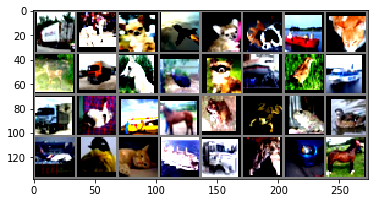

In [3]:
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

images.shape

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
my_path = "/content/gdrive/My Drive/EVA4_S7_CIFAR10_Moduled"
import sys
sys.path.append(my_path)
!ls /content/gdrive/My\ Drive/EVA4_S7_CIFAR10_Moduled

Mounted at /content/gdrive
 backbone.py		   EVA4_S7_Master.ipynb
 callhello.ipynb	   eva4_s8_model_save_100epochs.pth
 class_acc.py		   eva4_s8_model_save_125epochs.pth
'Copy of backbone.py'	   eva4_s8_model_save_50.pth
'Copy of class_acc.py'	   printhello.ipynb
'Copy of train_block.py'   __pycache__
'Copy of val_block.py'	   train_block.py
 EVA4_S7_backbone.py	   val_block.py
 EVA4_S7_Main_File.ipynb


In [5]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = models.resnet18().to(device)
# model = EVA4_S7_backbone.Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 16, 16]           9,408
       BatchNorm2d-2           [-1, 64, 16, 16]             128
              ReLU-3           [-1, 64, 16, 16]               0
         MaxPool2d-4             [-1, 64, 8, 8]               0
            Conv2d-5             [-1, 64, 8, 8]          36,864
       BatchNorm2d-6             [-1, 64, 8, 8]             128
              ReLU-7             [-1, 64, 8, 8]               0
            Conv2d-8             [-1, 64, 8, 8]          36,864
       BatchNorm2d-9             [-1, 64, 8, 8]             128
             ReLU-10             [-1, 64, 8, 8]               0
       BasicBlock-11             [-1, 64, 8, 8]               0
           Conv2d-12             [-1, 64, 8, 8]          36,864
      BatchNorm2d-13             [-1, 64, 8, 8]             128
             ReLU-14             [

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [9]:
for epoch in range(50):  # loop over the dataset multiple times  
    backbone.train(model,device,trainloader,optimizer,criterion,epoch,model_loss = 0.0)
print('Training Complete')

[1,  1500] loss: 1.350
[2,  1500] loss: 1.092
[3,  1500] loss: 0.984
[4,  1500] loss: 0.905
[5,  1500] loss: 0.839
[6,  1500] loss: 0.784
[7,  1500] loss: 0.746
[8,  1500] loss: 0.709
[9,  1500] loss: 0.678
[10,  1500] loss: 0.653
[11,  1500] loss: 0.629
[12,  1500] loss: 0.611
[13,  1500] loss: 0.588
[14,  1500] loss: 0.572
[15,  1500] loss: 0.553
[16,  1500] loss: 0.541
[17,  1500] loss: 0.522
[18,  1500] loss: 0.510
[19,  1500] loss: 0.499
[20,  1500] loss: 0.485
[21,  1500] loss: 0.479
[22,  1500] loss: 0.470
[23,  1500] loss: 0.459
[24,  1500] loss: 0.449
[25,  1500] loss: 0.444
[26,  1500] loss: 0.430
[27,  1500] loss: 0.421
[28,  1500] loss: 0.415
[29,  1500] loss: 0.408
[30,  1500] loss: 0.403
[31,  1500] loss: 0.393
[32,  1500] loss: 0.388
[33,  1500] loss: 0.380
[34,  1500] loss: 0.369
[35,  1500] loss: 0.367
[36,  1500] loss: 0.358
[37,  1500] loss: 0.351
[38,  1500] loss: 0.350
[39,  1500] loss: 0.343
[40,  1500] loss: 0.337
[41,  1500] loss: 0.335
[42,  1500] loss: 0.328
[

In [10]:
backbone.val_acc(testloader,model,device)

Accuracy of the network on the 10000 test images: 77.640000 %


In [0]:
checkpoint_path_50 = "/content/gdrive/My Drive/EVA4_S7_CIFAR10_Moduled/eva4_s8_model_save_50.pth"

In [0]:
valid_loss = 0.289 #Manually saving the last loss
checkpoint_50 = {
            'epoch': epoch + 1,
            'valid_loss_min': valid_loss,
            'state_dict': model.state_dict(),
            'optimizer': optimizer.state_dict(),
        }      

In [0]:
# save checkpoint
backbone.save_ckp(checkpoint_50, checkpoint_path_50)

In [0]:
model, optimizer, start_epoch, valid_loss = load_ckp(checkpoint_path_50, model, optimizer)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)

In [22]:
for epoch in range(start_epoch,100):  # loop over the dataset multiple times  
    backbone.train(model,device,trainloader,optimizer,criterion,epoch,model_loss = valid_loss)
print('Training Complete')

[51,  1500] loss: 0.243
[52,  1500] loss: 0.227
[53,  1500] loss: 0.222
[54,  1500] loss: 0.217
[55,  1500] loss: 0.214
[56,  1500] loss: 0.209
[57,  1500] loss: 0.207
[58,  1500] loss: 0.206
[59,  1500] loss: 0.203
[60,  1500] loss: 0.200
[61,  1500] loss: 0.200
[62,  1500] loss: 0.200
[63,  1500] loss: 0.197
[64,  1500] loss: 0.192
[65,  1500] loss: 0.194
[66,  1500] loss: 0.190
[67,  1500] loss: 0.194
[68,  1500] loss: 0.189
[69,  1500] loss: 0.186
[70,  1500] loss: 0.185
[71,  1500] loss: 0.185
[72,  1500] loss: 0.185
[73,  1500] loss: 0.186
[74,  1500] loss: 0.180
[75,  1500] loss: 0.182
[76,  1500] loss: 0.180
[77,  1500] loss: 0.180
[78,  1500] loss: 0.178
[79,  1500] loss: 0.178
[80,  1500] loss: 0.176
[81,  1500] loss: 0.174
[82,  1500] loss: 0.174
[83,  1500] loss: 0.172
[84,  1500] loss: 0.172
[85,  1500] loss: 0.172
[86,  1500] loss: 0.170
[87,  1500] loss: 0.166
[88,  1500] loss: 0.169
[89,  1500] loss: 0.166
[90,  1500] loss: 0.165
[91,  1500] loss: 0.166
[92,  1500] loss

In [0]:
checkpoint_path_100 = "/content/gdrive/My Drive/EVA4_S7_CIFAR10_Moduled/eva4_s8_model_save_100epochs.pth"

In [0]:
valid_loss = 0.153 #Manually saving the last loss
checkpoint_100 = {
            'epoch': epoch + 1,
            'valid_loss_min': valid_loss,
            'state_dict': model.state_dict(),
            'optimizer': optimizer.state_dict(),
        }      

In [0]:
# save checkpoint
backbone.save_ckp(checkpoint_100, checkpoint_path_100)

In [0]:
backbone.val_acc(testloader,model,device)

Accuracy of the network on the 10000 test images: 79.300000 %


In [0]:
model, optimizer, start_epoch, valid_loss = load_ckp(checkpoint_path_100, model, optimizer)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.00001, momentum=0.9)

In [18]:
for epoch in range(start_epoch,125):  # loop over the dataset multiple times  
    backbone.train(model,device,trainloader,optimizer,criterion,epoch,model_loss = valid_loss)
print('Training Complete')

[101,  1500] loss: 0.175
[102,  1500] loss: 0.173
[103,  1500] loss: 0.172
[104,  1500] loss: 0.172
[105,  1500] loss: 0.172
[106,  1500] loss: 0.170
[107,  1500] loss: 0.169
[108,  1500] loss: 0.170
[109,  1500] loss: 0.169
[110,  1500] loss: 0.170
[111,  1500] loss: 0.171
[112,  1500] loss: 0.170
[113,  1500] loss: 0.169
[114,  1500] loss: 0.168
[115,  1500] loss: 0.167
[116,  1500] loss: 0.168
[117,  1500] loss: 0.168
[118,  1500] loss: 0.169
[119,  1500] loss: 0.168
[120,  1500] loss: 0.167
[121,  1500] loss: 0.166
[122,  1500] loss: 0.169
[123,  1500] loss: 0.168
[124,  1500] loss: 0.167
[125,  1500] loss: 0.167
Training Complete


In [19]:
backbone.val_acc(testloader,model,device)

Accuracy of the network on the 10000 test images: 83.690000 %


In [0]:
checkpoint_path_125 = "/content/gdrive/My Drive/EVA4_S7_CIFAR10_Moduled/eva4_s8_model_save_125epochs.pth"

In [0]:
valid_loss = 0.167 #Manually saving the last loss
checkpoint_125 = {
            'epoch': epoch + 1,
            'valid_loss_min': valid_loss,
            'state_dict': model.state_dict(),
            'optimizer': optimizer.state_dict(),
        }      

In [0]:
# save checkpoint
backbone.save_ckp(checkpoint_125, checkpoint_path_125)

In [0]:
model, optimizer, start_epoch, valid_loss = load_ckp(checkpoint_path_125, model, optimizer)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [31]:
for epoch in range(start_epoch,200):  # loop over the dataset multiple times  
    backbone.train(model,device,trainloader,optimizer,criterion,epoch,model_loss = valid_loss)
print('Training Complete')

[126,  1500] loss: 0.226
[127,  1500] loss: 0.232
[128,  1500] loss: 0.224
[129,  1500] loss: 0.218
[130,  1500] loss: 0.220
[131,  1500] loss: 0.214
[132,  1500] loss: 0.213
[133,  1500] loss: 0.210
[134,  1500] loss: 0.204
[135,  1500] loss: 0.201
[136,  1500] loss: 0.199
[137,  1500] loss: 0.195
[138,  1500] loss: 0.196
[139,  1500] loss: 0.192
[140,  1500] loss: 0.190
[141,  1500] loss: 0.186
[142,  1500] loss: 0.185
[143,  1500] loss: 0.182
[144,  1500] loss: 0.184
[145,  1500] loss: 0.178
[146,  1500] loss: 0.171
[147,  1500] loss: 0.169
[148,  1500] loss: 0.167
[149,  1500] loss: 0.168
[150,  1500] loss: 0.169
[151,  1500] loss: 0.163
[152,  1500] loss: 0.162
[153,  1500] loss: 0.160
[154,  1500] loss: 0.158
[155,  1500] loss: 0.155
[156,  1500] loss: 0.155
[157,  1500] loss: 0.151
[158,  1500] loss: 0.150
[159,  1500] loss: 0.148
[160,  1500] loss: 0.146
[161,  1500] loss: 0.144
[162,  1500] loss: 0.145
[163,  1500] loss: 0.144
[164,  1500] loss: 0.140
[165,  1500] loss: 0.140


In [35]:
backbone.val_acc(testloader,model,device)

Accuracy of the network on the 10000 test images: 85.130000 %


In [34]:
backbone.class_acc(testloader,model,device,classes)

Accuracy of plane : 86 %
Accuracy of   car : 90 %
Accuracy of  bird : 74 %
Accuracy of   cat : 68 %
Accuracy of  deer : 74 %
Accuracy of   dog : 70 %
Accuracy of  frog : 82 %
Accuracy of horse : 85 %
Accuracy of  ship : 91 %
Accuracy of truck : 97 %
